<div style="background-color: lightblue; padding: 10px;">
    <h2>Zomato Analysis</h2>
</div>

This notebook shows the ananlysis of Zomato, a food delivery service. The data set contains restaurants name, address, website, rating, location, cuisines and other useful information.

In this analysis we will be restaurant rating, most common words, density of the restaurants using a heat map.

The analysis is carried out by Data Cleaning, Data Exploration and displaying Insights garnered utilizing common python packages like Pandas, NumPy nltk, folium and geopy.


In [1]:
# Import Packages

import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams, trigrams
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import warnings
from warnings import filterwarnings
filterwarnings('ignore')
import  matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alabi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Read Data Source into DataFrame

# Data Source on GitHub
url = 'https://raw.githubusercontent.com/Rennyunit/git_practice/main/Zomato.csv'

# Use Pandas to read data source into a DataFrame
df = pd.read_csv(url, index_col = 'index')

<div style="background-color: lightblue; padding: 10px;">
    <h3>| Data Inspection</h3>
</div>

In [3]:
# Check data types and structure

print(df.dtypes,'\n')
print(df.head(),'\n')
print(df.columns,'\n')
print(df.shape)

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object 

                                                     url  \
index                                                      
0      https://www.zomato.com/bangalore/jalsa-banasha...   
1      https://www.zomato.com/bangalore/spice-elephan...   
2      https://www.zomato.com/SanchurroBangalore?cont...   
3      https://www.zomato.com/bangalor

<div style="background-color: lightblue; padding: 10px;">
    <h3>| Columns Description</h3>
</div>

1. url contains the url of the restaurant in the zomato website

2. address contains the address of the restaurant in Bengaluru

3. name contains the name of the restaurant

4. online_order whether online ordering is available in the restaurant or not

5. book_table table book option available or not

6. rate contains the overall rating of the restaurant out of 5

7. votes contains total number of rating for the restaurant as of the above mentioned date

8. phone contains the phone number of the restaurant

9. location contains the neighborhood in which the restaurant is located

10. rest_type restaurant type

11. dish_liked dishes people liked in the restaurant

12. cuisines food styles, separated by comma

13. approx_cost(for two people) contains the approximate cost for meal for two people

14. reviews_list list of tuples containing reviews for the restaurant, each tuple

15. menu_item contains list of menus available in the restaurant

16. listed_in(type) type of meal

17. listed_in(city) contains the neighborhood in which the restaurant is listed

<div style="background-color: lightblue; padding: 10px;">
    <h3>| Data Cleaning: Missing and Duplicated Data</h3>
</div>

In [4]:
# Check for missing data

null_data  = df.isnull().sum()

missing_data_ratio = null_data/len(df)*100
print(missing_data_ratio)
print(f"\nThe maximum missing data in the {missing_data_ratio.sort_values(ascending  = False).reset_index()['index'][0]} column is {missing_data_ratio.max():.2f}% of the dataframe. \nDropping this data would significant affect the analysis, therefore a detailed check on individual columns with NULL values would be performed.")

url                             0.000
address                         0.000
name                            0.000
online_order                    0.000
book_table                      0.000
rate                           12.750
votes                           0.000
phone                           1.475
location                        0.025
rest_type                       0.375
dish_liked                     57.675
cuisines                        0.100
approx_cost(for two people)     0.150
reviews_list                    0.000
menu_item                       0.000
listed_in(type)                 0.000
listed_in(city)                 0.000
dtype: float64

The maximum missing data in the dish_liked column is 57.67% of the dataframe. 
Dropping this data would significant affect the analysis, therefore a detailed check on individual columns with NULL values would be performed.


In [5]:
# Check for duplicated data

duplicated_data  = df.duplicated().sum()
print(f" The dataset contains {duplicated_data} duplicated rows")

 The dataset contains 0 duplicated rows


In [6]:
# Check unique values of columns with NULL values

[(i, df[i].nunique()) for i in df[['rate', 'phone','location','rest_type', 'dish_liked', 'cuisines','approx_cost(for two people)']].columns]

[('rate', 50),
 ('phone', 2354),
 ('location', 34),
 ('rest_type', 57),
 ('dish_liked', 890),
 ('cuisines', 810),
 ('approx_cost(for two people)', 39)]

In [7]:
#  The  columns; rate, location, rest_type have low amount of unique vlaues and therefore will be further investigated

print(df['rate'].unique())

#  The strings 'NEW' and "-" wil be replaced by zero or np.nan
print(df['rate'].replace(('NEW' , '-') , np.nan , inplace=True))

# The rates should be expressed as whole number and not as fractions. Values to be trimmed to show rating only i.e '4.8' instead of '4.8 /5'
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)
print(df['rate'].unique())

['4.1/5' '3.8/5' '3.7/5' '3.6/5' '4.6/5' '4.0/5' '4.2/5' '3.9/5' '3.1/5'
 '3.0/5' '3.2/5' '3.3/5' '2.8/5' '4.4/5' '4.3/5' 'NEW' '2.9/5' '3.5/5' nan
 '2.6/5' '3.8 /5' '3.4/5' '4.5/5' '2.5/5' '2.7/5' '4.7/5' '2.4/5' '2.2/5'
 '2.3/5' '3.4 /5' '-' '3.6 /5' '4.8/5' '3.9 /5' '4.2 /5' '4.0 /5' '4.1 /5'
 '3.7 /5' '3.1 /5' '2.9 /5' '3.3 /5' '2.8 /5' '3.5 /5' '2.7 /5' '2.5 /5'
 '3.2 /5' '2.6 /5' '4.5 /5' '4.3 /5' '4.4 /5' '4.9/5']
None
[4.1 3.8 3.7 3.6 4.6 4.  4.2 3.9 3.1 3.  3.2 3.3 2.8 4.4 4.3 nan 2.9 3.5
 2.6 3.4 4.5 2.5 2.7 4.7 2.4 2.2 2.3 4.8 4.9]


<div style="background-color: lightblue; padding: 10px;">
    <h3>| Data Analysis</h3>
</div>

#### Rrelationship between online orders and restaurant rating

In [8]:
# Create a frequency Table

rating_orders = pd.crosstab(df['rate'] , df['online_order'])
rating_orders

online_order,No,Yes
rate,,
2.2,2,0
2.3,3,1
2.4,5,2
2.5,1,7
2.6,5,20
2.7,16,17
2.8,10,31
2.9,32,42
3.0,33,63


<Axes: xlabel='rate'>

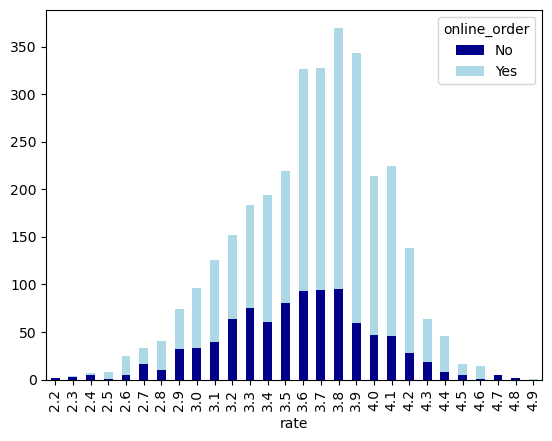

In [9]:
rating_orders.plot(kind='bar' , stacked=True, color  = ['DarkBlue' ,'LightBlue'])

#### Text Analysis -  Restaurant Types

In [52]:
#Check null values in restaurant type column

print(df['rest_type'].isnull().sum())

# Remove null rows from dataset
data = df.dropna(subset=['rest_type'])

14


url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                            735
votes                             0
phone                            58
location                          0
rest_type                         0
dish_liked                     2294
cuisines                          0
approx_cost(for two people)       5
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [11]:
# Check for the distribution of the type of restaurants

data['rest_type'].value_counts()

Quick Bites                      1694
Casual Dining                     831
Cafe                              293
Dessert Parlor                    208
Delivery                          163
Takeaway, Delivery                119
Bakery                            109
Beverage Shop                      69
Food Court                         55
Sweet Shop                         48
Casual Dining, Bar                 44
Beverage Shop, Quick Bites         27
Bar                                27
Bakery, Quick Bites                22
Casual Dining, Cafe                21
Cafe, Casual Dining                19
Sweet Shop, Quick Bites            17
Pub                                16
Lounge                             15
Food Truck                         14
Takeaway                           14
Quick Bites, Cafe                  14
Kiosk                              13
Mess                               12
Beverage Shop, Dessert Parlor      10
Bar, Casual Dining                  9
Microbrewery

In [12]:
### Extracting data for 'Quick Bites' as the most popular type

quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]
quick_bites_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
index,,,,,,,,,,,,,,,,,
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
23,https://www.zomato.com/bangalore/my-tea-house-...,"224/Y, 4th Phase, 7th Block, 100 Feet Ring Roa...",My Tea House,Yes,No,3.6,62,080 65975430\r\n+91 7337733798,Banashankari,"Quick Bites, Cafe","Pasta, Iced Tea","Italian, Fast Food, Cafe, European",600,"[('Rated 4.0', ""RATED\n So, went here with fr...",[],Cafes,Banashankari
26,https://www.zomato.com/bangalore/coffee-tindi-...,"27th Cross Rd, Banashankari Stage II, Banashan...",Coffee Tindi,Yes,No,3.8,75,+91 9945758046,Banashankari,"Cafe, Quick Bites",NaN,"Cafe, South Indian",200,"[('Rated 5.0', 'RATED\n please provide some e...",[],Cafes,Banashankari
31,https://www.zomato.com/bangalore/foodiction-1-...,"2/1, 7th Main, Dwarakangar, Hosakeregalli, Ban...",Foodiction,Yes,No,2.8,506,+91 9916107070,Banashankari,Quick Bites,"Burgers, Lassi, Chicken Grill, Naan, Momos, Ch...","North Indian, Fast Food, Chinese, Burger",500,"[('Rated 1.0', ""RATED\n Worst restaurant ever...",[],Delivery,Banashankari
34,https://www.zomato.com/bangalore/faasos-banash...,"80, BDA Complex, 2nd Stage, Banashankari, Bang...",Faasos,Yes,No,4.2,415,+91 7700020020,Banashankari,Quick Bites,"Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...","North Indian, Biryani, Fast Food",500,"[('Rated 3.0', 'RATED\n Not worth for the mon...","['Chole Kulcha Meal', 'Upvas Aloo Paratha With...",Delivery,Banashankari


In [13]:
# Converting all the text to lowercase
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

In [14]:
#  Creating a regular expression tokenizer that wil have only alphabets  i.e remove all special characters
 
tokenizer = RegexpTokenizer("[a-zA-Z]+")
print(tokenizer)
print(tokenizer.tokenize(quick_bites_df['reviews_list'][3]))

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)
['rated', 'rated', 'n', 'great', 'food', 'and', 'proper', 'karnataka', 'style', 'full', 'meals', 'been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'rated', 'rated', 'n', 'reached', 'the', 'place', 'at', 'pm', 'on', 'saturday', 'half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'what', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'the', 'taste', 'was', 'also', 'very', 'average', 'only', 'dosa', 'and', 'holige', 'were', 'good', 'there', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'the', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'had', 'to', 'call', 'them', 'repeatedly', 'rated', 'rated', 'n', 'had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'pl

In [15]:
reviews_tokens = quick_bites_df['reviews_list'].apply(tokenizer.tokenize)
reviews_tokens

index
3       [rated, rated, n, great, food, and, proper, ka...
23      [rated, rated, n, so, went, here, with, friend...
26      [rated, rated, n, please, provide, some, extra...
31      [rated, rated, n, worst, restaurant, ever, veg...
34      [rated, rated, n, not, worth, for, the, money,...
                              ...                        
3988    [rated, rated, n, sorry, to, say, this, i, hav...
3990    [rated, rated, n, great, place, very, nice, am...
3992    [rated, rated, n, actually, i, am, fan, of, th...
3995                                                   []
3996    [rated, rated, n, i, don, t, know, whether, it...
Name: reviews_list, Length: 1805, dtype: object

#### Performing Unigram analysis & removal of stopwords

In [16]:
# Show Python stopwords that add no meaning to analysis

stop = stopwords.words('english')

# Adding custom words to stopwords 
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
# Initialize index of tekenized dataset

rev3 = reviews_tokens[3]

# Remove stopwords from tokenized dataset
print([token for token in rev3 if token not in stop])

['great', 'food', 'proper', 'karnataka', 'style', 'full', 'meals', 'twice', 'fully', 'satisfied', 'give', 'stars', 'well', 'managed', 'reached', 'place', 'pm', 'saturday', 'half', 'items', 'menu', 'annoying', 'food', 'cold', 'taste', 'also', 'average', 'dosa', 'holige', 'good', 'people', 'restaurant', 'service', 'still', 'slow', 'waiters', 'standing', 'one', 'corner', 'talking', 'call', 'repeatedly', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'one', 'good', 'hotel', 'price', 'udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'cant', 'clean', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us', 'full', 'amount', 'lastly', 'u', 'r', 'ok', 'b', 'seated', 'random', 'people', 'adjust', 'table', 'mann

In [18]:
## Remove stopwords from dataset

reviews_tokens_clean = reviews_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])
reviews_tokens_clean

index
3       [great, food, proper, karnataka, style, full, ...
23      [went, friends, tea, ambience, striking, say, ...
26      [please, provide, extra, sambal, quantity, les...
31      [worst, restaurant, ever, veg, manchurian, wor...
34      [worth, money, pay, ambience, good, enough, se...
                              ...                        
3988    [sorry, say, never, given, kind, harsh, review...
3990    [great, place, nice, ambiance, concept, food, ...
3992    [actually, fan, kerala, paratha, chineese, dry...
3995                                                   []
3996    [know, whether, authentic, taste, thalassery, ...
Name: reviews_list, Length: 1805, dtype: object

In [19]:
print(type(reviews_tokens_clean))

#  Convert Series into a list
total_reviews_2D = list(reviews_tokens_clean)

<class 'pandas.core.series.Series'>


In [20]:
# Extract tokens as a 1-D list
total_reviews_1D = []

for review in total_reviews_2D:
    for word in review:
        total_reviews_1D.append(word)

total_reviews_1D

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

#### Unigram Analysis

In [21]:
# obtain the frequency of individual words in the reviews, for this u have to use FreqDist .. 

fd = FreqDist()
for word in total_reviews_1D:
    fd[word] = fd[word] + 1
# Examining the top 20 most frequent words
fd.most_common(20)

[('good', 15994),
 ('food', 15704),
 ('place', 11369),
 ('taste', 6359),
 ('chicken', 5826),
 ('ordered', 4292),
 ('one', 3872),
 ('service', 3713),
 ('like', 3602),
 ('order', 3439),
 ('time', 3434),
 ('also', 3354),
 ('try', 3231),
 ('restaurant', 3069),
 ('best', 2984),
 ('quality', 2897),
 ('nice', 2759),
 ('really', 2722),
 ('delivery', 2672),
 ('tasty', 2662)]

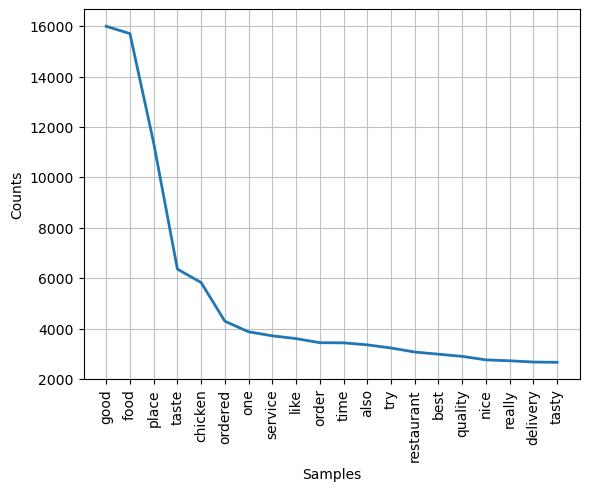

<Axes: xlabel='Samples', ylabel='Counts'>

In [22]:
# Plotting the top 20 most frequent words
fd.plot(20)

#### Bigram Analysis

In [23]:
# Generating bigrams from the reviews; Create a generator object
bi_grams = bigrams(total_reviews_1D)
bi_grams

<generator object bigrams at 0x0000021EDB2C42E0>

In [24]:
# Getting the bigram frequency distribution

fd_bigrams = FreqDist()

for bigram in bi_grams:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1


In [25]:
fd_bigrams.most_common(20)

[(('good', 'food'), 1177),
 (('south', 'indian'), 1161),
 (('food', 'good'), 1052),
 (('north', 'indian'), 962),
 (('must', 'try'), 900),
 (('good', 'place'), 789),
 (('really', 'good'), 787),
 (('taste', 'good'), 718),
 (('masala', 'dosa'), 685),
 (('pocket', 'friendly'), 684),
 (('fried', 'rice'), 681),
 (('good', 'good'), 638),
 (('value', 'money'), 575),
 (('good', 'taste'), 562),
 (('indian', 'food'), 554),
 (('also', 'good'), 540),
 (('quality', 'food'), 538),
 (('visit', 'place'), 531),
 (('one', 'best'), 514),
 (('tasty', 'food'), 488)]

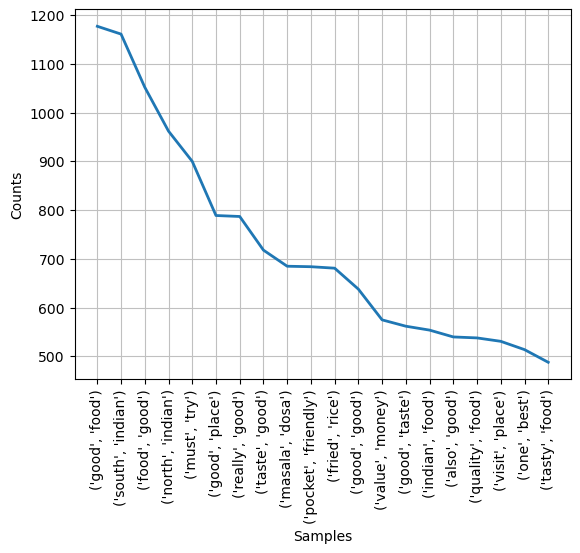

<Axes: xlabel='Samples', ylabel='Counts'>

In [26]:
# Plotting the top 20 most frequent bigrams
fd_bigrams.plot(20)

#### Trigram Analysis

In [27]:
tri_grams = trigrams(total_reviews_1D)

In [28]:
# Generating trigrams from the reviews
fd_trigrams = FreqDist()

for trigram in tri_grams:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [29]:
fd_trigrams.most_common(20)

[(('south', 'indian', 'food'), 302),
 (('north', 'indian', 'food'), 227),
 (('paneer', 'butter', 'masala'), 169),
 (('worst', 'food', 'ever'), 144),
 (('north', 'indian', 'chinese'), 135),
 (('good', 'food', 'good'), 127),
 (('authentic', 'south', 'indian'), 119),
 (('must', 'visit', 'place'), 119),
 (('chicken', 'fried', 'rice'), 109),
 (('north', 'indian', 'dishes'), 106),
 (('good', 'good', 'food'), 99),
 (('ordered', 'chicken', 'biryani'), 98),
 (('south', 'indian', 'north'), 94),
 (('honey', 'chilli', 'potato'), 93),
 (('indian', 'north', 'indian'), 92),
 (('south', 'indian', 'breakfast'), 87),
 (('food', 'taste', 'good'), 83),
 (('south', 'indian', 'dishes'), 82),
 (('good', 'value', 'money'), 77),
 (('veg', 'non', 'veg'), 76)]

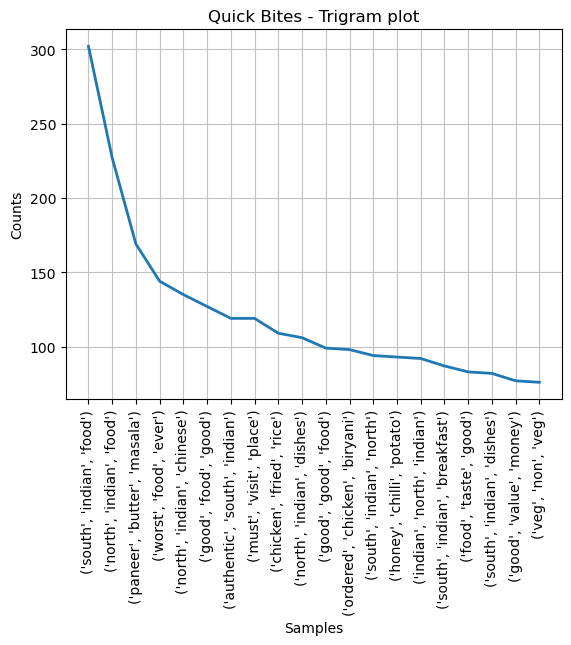

In [30]:
# Plotting the top 20 most frequent bigrams
plt.title('Quick Bites - Trigram plot')
fd_trigrams.plot(20)

plt.show()

#### Geographical Analysis - Cuisine and Location

In [31]:
# Check data in location column

df['location'].unique()

# Include Capital, State and Country to extract accurate geocodes
df['location'] = df['location'] + " , Bangalore  , Karnataka , India "

In [32]:
#Create a copy of dataframe

df_geo = df.copy()

# Check for null data in location column
df_geo['location'].isnull().sum()

# Remove null data
df_geo = df_geo.dropna(subset=['location'])

In [33]:
# Extract unique location data

locations = pd.DataFrame(df_geo['location'].unique())
locations.columns = ['name']

In [34]:
### Use geopy Python package to create api object

geolocator = Nominatim(user_agent="app" , timeout=None)
geolocator

In [35]:
# Iterate through locations to extract the latitude and longitude

lat=[]
lon=[]

for location in locations['name']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)
    

In [36]:
# Include geocodes as columns in the locations dataframe

locations['latitude'] = lat
locations['longitude'] = lon
locations

,name,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , ...",12.908149,77.555318
5,"Rajarajeshwari Nagar , Bangalore , Karnataka ...",12.927441,77.515522
6,"Vijay Nagar , Bangalore , Karnataka , India",12.966072,77.612594
7,"Uttarahalli , Bangalore , Karnataka , India",12.905568,77.545544
8,"JP Nagar , Bangalore , Karnataka , India",12.909694,77.586607
9,"South Bangalore , Bangalore , Karnataka , India",12.930603,77.590802


In [37]:
### Verify if data is clean
locations.isnull().sum()

#locations[locations['latitude'].isna()]

name         0
latitude     0
longitude    0
dtype: int64

In [38]:
# Check and remove null data from cuisines column

df['cuisines'].isnull().sum()

df = df.dropna(subset=['cuisines'])

In [39]:
# Explore the geographical location of South Indian restraurants

south_india = df[df['cuisines'].str.contains('South Indian')]
print(south_india.shape)
print(south_india.head(2))

(920, 17)
                                                     url  \
index                                                      
3      https://www.zomato.com/bangalore/addhuri-udupi...   
6      https://www.zomato.com/bangalore/rosewood-inte...   

                                                 address  \
index                                                      
3      1st Floor, Annakuteera, 3rd Stage, Banashankar...   
6      19/1, New Timberyard Layout, Beside Satellite ...   

                                                  name online_order  \
index                                                                 
3                                Addhuri Udupi Bhojana           No   
6      Rosewood International Hotel - Bar & Restaurant           No   

      book_table  rate  votes                           phone  \
index                                                           
3             No   3.7     88                  +91 9620009302   
6             No   3.6      

In [53]:
# Check count of restaurants in particular location

south_india_rest_count = south_india['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})
south_india_rest_count

,name,count
0,"Banashankari , Bangalore , Karnataka , India",209
1,"Basavanagudi , Bangalore , Karnataka , India",168
2,"Bannerghatta Road , Bangalore , Karnataka , I...",141
3,"Jayanagar , Bangalore , Karnataka , India",138
4,"JP Nagar , Bangalore , Karnataka , India",124
5,"BTM , Bangalore , Karnataka , India",29
6,"Mysore Road , Bangalore , Karnataka , India",16
7,"Shanti Nagar , Bangalore , Karnataka , India",14
8,"Sarjapur Road , Bangalore , Karnataka , India",13
9,"Bellandur , Bangalore , Karnataka , India",13


#### Geographical Heat Map

In [41]:
# Merge the South_indian and location dataframe to include the geocodes

heatmap_df = south_india_rest_count.merge(locations , on='name' , how='left')

In [42]:
heatmap_df

,name,count,latitude,longitude
0,"Banashankari , Bangalore , Karnataka , India",209,12.915221,77.573598
1,"Basavanagudi , Bangalore , Karnataka , India",168,12.941726,77.575502
2,"Bannerghatta Road , Bangalore , Karnataka , I...",141,12.947431,77.602378
3,"Jayanagar , Bangalore , Karnataka , India",138,12.929273,77.582423
4,"JP Nagar , Bangalore , Karnataka , India",124,12.909694,77.586607
5,"BTM , Bangalore , Karnataka , India",29,12.911276,77.604565
6,"Mysore Road , Bangalore , Karnataka , India",16,12.946662,77.530090
7,"Shanti Nagar , Bangalore , Karnataka , India",14,12.957555,77.597910
8,"Sarjapur Road , Bangalore , Karnataka , India",13,12.920441,77.665328
9,"Bellandur , Bangalore , Karnataka , India",13,12.931032,77.678247


In [43]:
# Create a map object using folium python package

basemap = folium.Map()
basemap

In [44]:
#Include South Indian locations on map
HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)

# Show heat map
basemap

### Automate Task

#### Automate task for other cuisines:North Indian, Chinese, Fast food and so on

In [46]:
#Define a function heatmap with all steps carried out above

def heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={'index':'name' , "location":"count"})
    heatmap_df = cuisine_rest_count.merge(locations , on='name' , how='left')
    print(heatmap_df.head(4))
    
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap

In [47]:
#Try function on Fast Food cuisine

heatmap('Fast Food')

                                                name  count   latitude  \
0     Banashankari , Bangalore  , Karnataka , India     147  12.915221   
1  Bannerghatta Road , Bangalore  , Karnataka , I...    136  12.947431   
2     Basavanagudi , Bangalore  , Karnataka , India     133  12.941726   
3        Jayanagar , Bangalore  , Karnataka , India      95  12.929273   

   longitude  
0  77.573598  
1  77.602378  
2  77.575502  
3  77.582423  


<div style="background-color: lightblue; padding: 10px;">
    <h2>Summary</h2>
</div>

- Most restaurants that have a high number of rating >3 have higher number of  ratings form online orders.
 
- Text Analysis 

Food preferences visible in the unigram, bigram, trigram are:
Fried Rice, Ice cream, non-veg, chicken biryani, main course, masala, dosa and so on.
   
The restaurant experience are majorly: 
good food, pocket friendly, quality, delicious, home delivery and so on.

    
- Geographical Analysis   

The restaurants tend to concentrate in central bangalore area. This infers that the central area is a good location for citing a new restaurant.

Heatmap is a good measure when we have latitude,longitude or importance of that particular place or count of that place
   

In [63]:
fd_bigrams.most_common(50)

[(('good', 'food'), 1177),
 (('south', 'indian'), 1161),
 (('food', 'good'), 1052),
 (('north', 'indian'), 962),
 (('must', 'try'), 900),
 (('good', 'place'), 789),
 (('really', 'good'), 787),
 (('taste', 'good'), 718),
 (('masala', 'dosa'), 685),
 (('pocket', 'friendly'), 684),
 (('fried', 'rice'), 681),
 (('good', 'good'), 638),
 (('value', 'money'), 575),
 (('good', 'taste'), 562),
 (('indian', 'food'), 554),
 (('also', 'good'), 540),
 (('quality', 'food'), 538),
 (('visit', 'place'), 531),
 (('one', 'best'), 514),
 (('tasty', 'food'), 488),
 (('worst', 'food'), 455),
 (('non', 'veg'), 453),
 (('vada', 'pav'), 445),
 (('good', 'service'), 435),
 (('food', 'quality'), 433),
 (('nice', 'place'), 397),
 (('best', 'place'), 396),
 (('home', 'delivery'), 395),
 (('self', 'service'), 390),
 (('small', 'place'), 387),
 (('must', 'visit'), 382),
 (('chicken', 'biryani'), 367),
 (('ordered', 'chicken'), 365),
 (('quantity', 'less'), 356),
 (('taste', 'food'), 350),
 (('worth', 'money'), 319)

In [62]:
fd.most_common(20)

[('good', 15994),
 ('food', 15704),
 ('place', 11369),
 ('taste', 6359),
 ('chicken', 5826),
 ('ordered', 4292),
 ('one', 3872),
 ('service', 3713),
 ('like', 3602),
 ('order', 3439),
 ('time', 3434),
 ('also', 3354),
 ('try', 3231),
 ('restaurant', 3069),
 ('best', 2984),
 ('quality', 2897),
 ('nice', 2759),
 ('really', 2722),
 ('delivery', 2672),
 ('tasty', 2662)]

In [60]:
fd_trigrams.most_common(50)

[(('south', 'indian', 'food'), 302),
 (('north', 'indian', 'food'), 227),
 (('paneer', 'butter', 'masala'), 169),
 (('worst', 'food', 'ever'), 144),
 (('north', 'indian', 'chinese'), 135),
 (('good', 'food', 'good'), 127),
 (('authentic', 'south', 'indian'), 119),
 (('must', 'visit', 'place'), 119),
 (('chicken', 'fried', 'rice'), 109),
 (('north', 'indian', 'dishes'), 106),
 (('good', 'good', 'food'), 99),
 (('ordered', 'chicken', 'biryani'), 98),
 (('south', 'indian', 'north'), 94),
 (('honey', 'chilli', 'potato'), 93),
 (('indian', 'north', 'indian'), 92),
 (('south', 'indian', 'breakfast'), 87),
 (('food', 'taste', 'good'), 83),
 (('south', 'indian', 'dishes'), 82),
 (('good', 'value', 'money'), 77),
 (('veg', 'non', 'veg'), 76),
 (('good', 'quality', 'food'), 74),
 (('south', 'indian', 'restaurant'), 73),
 (('pocket', 'friendly', 'place'), 73),
 (('food', 'quality', 'good'), 72),
 (('home', 'made', 'food'), 72),
 (('quality', 'food', 'good'), 71),
 (('one', 'best', 'places'), 70),